In [1]:
%tensorflow_version 2.x

In [2]:
import numpy
from tensorflow.keras.datasets import cifar10 
import numpy as np
np.random.seed(10)

# 資料準備

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [5]:
!ls ~/.keras/datasets

cifar-10-batches-py  cifar-10-batches-py.tar.gz


查看影像資料

In [6]:
print('train:',len(x_train_image))
print('test:',len(x_test_image))

train: 50000
test: 10000


In [7]:
x_train_image.shape 

(50000, 32, 32, 3)

In [8]:
x_test_image.shape 

(10000, 32, 32, 3)

In [9]:
x_test_image[0].shape

(32, 32, 3)

In [10]:
x_test_image[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

查看label資料

In [11]:
print(y_train_label.shape)
print(y_test_label.shape)

(50000, 1)
(10000, 1)


In [12]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [13]:
print(y_train_label.shape)
print(y_test_label.shape)

(50000,)
(10000,)


In [14]:
y_train_label.shape 

(50000,)

In [15]:
y_test_label.shape

(10000,)

In [16]:
y_train_label[1]

9

In [17]:
import matplotlib.pyplot as plt

In [18]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [19]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

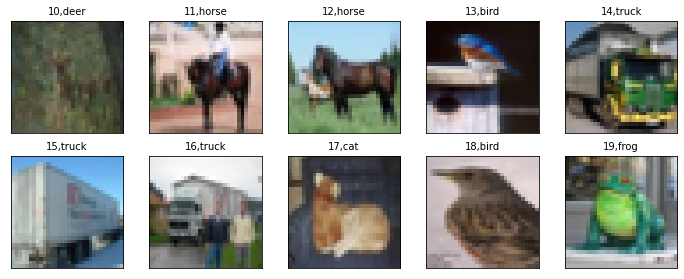

In [20]:
plot_images_labels_prediction(x_train_image,
                              y_train_label,
                              [],
                              10)

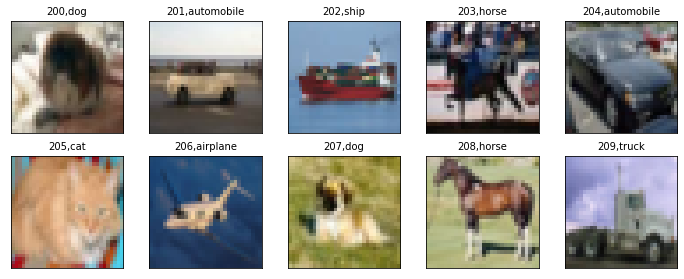

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,[],200)

In [22]:
print('x_img_test:',x_test_image.shape)
print('y_label_test :',y_test_label.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000,)


# Image normalize 

In [23]:
x_train_image[0][0][0]

array([59, 62, 63], dtype=uint8)

In [24]:
x_train_normalize = x_train_image.astype('float32') / 255.0 
x_test_normalize = x_test_image.astype('float32') / 255.0

In [25]:
x_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# 轉換label 為OneHot Encoding

In [26]:
from tensorflow.keras import utils

In [27]:
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [28]:
print(y_train_label[0])

6


In [29]:
y_train_onehot[0] 

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [30]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)
